In [1]:
import string
import numpy  as np
import random 
from glob import glob
import os 
from os.path import join 
##
import torch 
import torch.nn as nn 
import unicodedata 


In [2]:
## Training Varialble

device=('cuda' if torch.cuda.is_available() else "cpu")

In [3]:
string.ascii_lowercase

'abcdefghijklmnopqrstuvwxyz'

In [4]:
special_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"

In [5]:
name='akash#@'

In [6]:
[ch for ch in name if ch not in special_chars]

['a', 'k', 'a', 's', 'h']

In [7]:
def filter_sp_char(name):
    filter_list=[ch for ch in name if ch not in special_chars]
    return ''.join(filter_list)

In [8]:
filter_sp_char(name)

'akash'

In [9]:
data_dire='../data/chat_gen_data/'
all_letters = string.ascii_letters ## We will use this to give ids to each letter 
sos_index=len(all_letters)
eos_index=len(all_letters)+1
unk_index=len(all_letters)+2
n_letters = len(all_letters) + 3 # Plus SOO,EOS, and UNK marker

In [10]:
### Data Cleaning
special_chars = "!\"#$%&'()*+,-./:;<=>?@[\\]^_`{|}~"
def filter_sp_char(name):
    filter_list=[ch for ch in name if ch not in special_chars]
    return ''.join(filter_list)

##testing 
name='akash#@'
print(f'filter name : {filter_sp_char(name)}')

filter name : akash


In [11]:
## what is inside names folder 
os.listdir(data_dire+'/names')

['Arabic.txt',
 'Chinese.txt',
 'Czech.txt',
 'Dutch.txt',
 'English.txt',
 'French.txt',
 'German.txt',
 'Greek.txt',
 'Irish.txt',
 'Italian.txt',
 'Japanese.txt',
 'Korean.txt',
 'Polish.txt',
 'Portuguese.txt',
 'Russian.txt',
 'Scottish.txt',
 'Spanish.txt',
 'Vietnamese.txt']

### Understanding the preprocessing task 

#### Cleaning the dataset

In [12]:
### let is open one of the text files "English.txt" to see what the names looks like 
## we get names like this 
with open(join(data_dire,'names','English.txt')) as f:
    for line in f:
        print(line.strip()) ##strips char like '\n'

Abbas
Abbey
Abbott
Abdi
Abel
Abraham
Abrahams
Abrams
Ackary
Ackroyd
Acton
Adair
Adam
Adams
Adamson
Adanet
Addams
Adderley
Addinall
Addis
Addison
Addley
Aderson
Adey
Adkins
Adlam
Adler
Adrol
Adsett
Agar
Ahern
Aherne
Ahmad
Ahmed
Aikman
Ainley
Ainsworth
Aird
Airey
Aitchison
Aitken
Akhtar
Akram
Alam
Alanson
Alber
Albert
Albrighton
Albutt
Alcock
Alden
Alder
Aldersley
Alderson
Aldred
Aldren
Aldridge
Aldworth
Alesbury
Alexandar
Alexander
Alexnader
Alford
Algar
Ali
Alker
Alladee
Allam
Allan
Allard
Allaway
Allcock
Allcott
Alldridge
Alldritt
Allen
Allgood
Allington
Alliott
Allison
Allkins
Allman
Allport
Allsop
Allum
Allwood
Almond
Alpin
Alsop
Altham
Althoff
Alves
Alvey
Alway
Ambrose
Amesbury
Amin
Amner
Amod
Amor
Amos
Anakin
Anderson
Andersson
Anderton
Andrew
Andrews
Angus
Anker
Anley
Annan
Anscombe
Ansell
Anstee
Anthony
Antic
Anton
Antony
Antram
Anwar
Appleby
Appleton
Appleyard
Apsley
Arah
Archer
Ardern
Arkins
Armer
Armitage
Armour
Armsden
Armstrong
Arnall
Arnett
Arnold
Arnott
Arrowsmith
Arscott

FIrst step is to `standarise or normalise` the text according to unicode format. We will check for each of the character in the above sentence for this. 

In order to achieve this we cam use: unicode.normalize("NFD","string"); 

The above function will return "normalised_string". *However, not that visually, when print(), boih
original string and normalized_string looks same.* However, they are not same. As shown in below example:

In [13]:
import unicodedata

s = "héllò"
normalized_s = unicodedata.normalize('NFD', s) ##standarise each text 
print(f's: {s} |normalized_s: {normalized_s}') ## looks same
 ## Although both of the text looks same, normalised_s is standaries ; since characters can have multiple representation
 #because of factors such as diacritics

s==normalized_s

s: héllò |normalized_s: héllò


False

Next, we wanna make sure that each character are not NonSpacing character (characters that are used in 
a combination with preceding characters to modify their appearance). Example. in above sentence we don't wanna include "é,ò". We can filter that using :`unicodedata.category(c) =='Mn': 

Lastly, we wanna make sure that each character are in above defined `all_letters`

Example code below 

In [14]:
for c in normalized_s:
    
    print(f'{c}: {unicodedata.category(c)}') ## Here we can see Mn character ## wqe will remove it
       

h: Ll
e: Ll
́: Mn
l: Ll
l: Ll
o: Ll
̀: Mn


In [15]:
## Putting the Preprocessing alltogether 

def unicodeToAscii(s): ## s will be string such as "Ronaldo"
    s=s.lower()
    return ''.join( ## join is used to join iterable exam: ''.join(['A','G'])==>'AG'
        c for c in unicodedata.normalize('NFD', s) 
        if unicodedata.category(c) != 'Mn'
        and c in all_letters ##also remove small characters
    )

## Creating the dataset

In [16]:
# Read a file and split into lines
def readLines(filename):
    with open(filename, encoding='utf-8') as some_file:
        
        
        return [unicodeToAscii(line.strip()) for line in some_file]

In [17]:
filename=glob(join(data_dire,'names','*.txt'))[0]

In [18]:
readLines(filename) ## we have a list of names from a text files (names are preprocessed)

['khoury',
 'nahas',
 'daher',
 'gerges',
 'nazari',
 'maalouf',
 'gerges',
 'naifeh',
 'guirguis',
 'baba',
 'sabbagh',
 'attia',
 'tahan',
 'haddad',
 'aswad',
 'najjar',
 'dagher',
 'maloof',
 'isa',
 'asghar',
 'nader',
 'gaber',
 'abboud',
 'maalouf',
 'zogby',
 'srour',
 'bahar',
 'mustafa',
 'hanania',
 'daher',
 'tuma',
 'nahas',
 'saliba',
 'shamoon',
 'handal',
 'baba',
 'amari',
 'bahar',
 'atiyeh',
 'said',
 'khouri',
 'tahan',
 'baba',
 'mustafa',
 'guirguis',
 'sleiman',
 'seif',
 'dagher',
 'bahar',
 'gaber',
 'harb',
 'seif',
 'asker',
 'nader',
 'antar',
 'awad',
 'srour',
 'shadid',
 'hajjar',
 'hanania',
 'kalb',
 'shadid',
 'bazzi',
 'mustafa',
 'masih',
 'ghanem',
 'haddad',
 'isa',
 'antoun',
 'sarraf',
 'sleiman',
 'dagher',
 'najjar',
 'malouf',
 'nahas',
 'naser',
 'saliba',
 'shamon',
 'malouf',
 'kalb',
 'daher',
 'maalouf',
 'wasem',
 'kanaan',
 'naifeh',
 'boutros',
 'moghadam',
 'masih',
 'sleiman',
 'aswad',
 'cham',
 'assaf',
 'quraishi',
 'shalhoub',
 '

In [19]:
# Build the category_lines dictionary, a list of lines per category
category_lines = {}
all_categories = []
for filename in glob(join(data_dire,'names','*.txt')):
    category = os.path.splitext(os.path.basename(filename))[0]
    all_categories.append(category)
    lines = readLines(filename)
    category_lines[category] = lines

In [20]:
category_lines.keys()

dict_keys(['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese'])

In [21]:
print(all_categories)

['Arabic', 'Chinese', 'Czech', 'Dutch', 'English', 'French', 'German', 'Greek', 'Irish', 'Italian', 'Japanese', 'Korean', 'Polish', 'Portuguese', 'Russian', 'Scottish', 'Spanish', 'Vietnamese']


In [22]:
##
n_categories=len(all_categories)


In [23]:
category_lines

{'Arabic': ['khoury',
  'nahas',
  'daher',
  'gerges',
  'nazari',
  'maalouf',
  'gerges',
  'naifeh',
  'guirguis',
  'baba',
  'sabbagh',
  'attia',
  'tahan',
  'haddad',
  'aswad',
  'najjar',
  'dagher',
  'maloof',
  'isa',
  'asghar',
  'nader',
  'gaber',
  'abboud',
  'maalouf',
  'zogby',
  'srour',
  'bahar',
  'mustafa',
  'hanania',
  'daher',
  'tuma',
  'nahas',
  'saliba',
  'shamoon',
  'handal',
  'baba',
  'amari',
  'bahar',
  'atiyeh',
  'said',
  'khouri',
  'tahan',
  'baba',
  'mustafa',
  'guirguis',
  'sleiman',
  'seif',
  'dagher',
  'bahar',
  'gaber',
  'harb',
  'seif',
  'asker',
  'nader',
  'antar',
  'awad',
  'srour',
  'shadid',
  'hajjar',
  'hanania',
  'kalb',
  'shadid',
  'bazzi',
  'mustafa',
  'masih',
  'ghanem',
  'haddad',
  'isa',
  'antoun',
  'sarraf',
  'sleiman',
  'dagher',
  'najjar',
  'malouf',
  'nahas',
  'naser',
  'saliba',
  'shamon',
  'malouf',
  'kalb',
  'daher',
  'maalouf',
  'wasem',
  'kanaan',
  'naifeh',
  'boutro

In [24]:
## So we can there are a bunch of names (English on the above files)

Since this is 'character wise generation', and in NLP first is to a) Split a word to characters (tokenize), b) Give ids to each characters

## Creating the models 
This notebook is based on Original Turtorial found in the official `PyTorch` NLP from Scratch. 

We will build model based on this architecture: [Architecture](https://i.imgur.com/jzVrf7f.png)
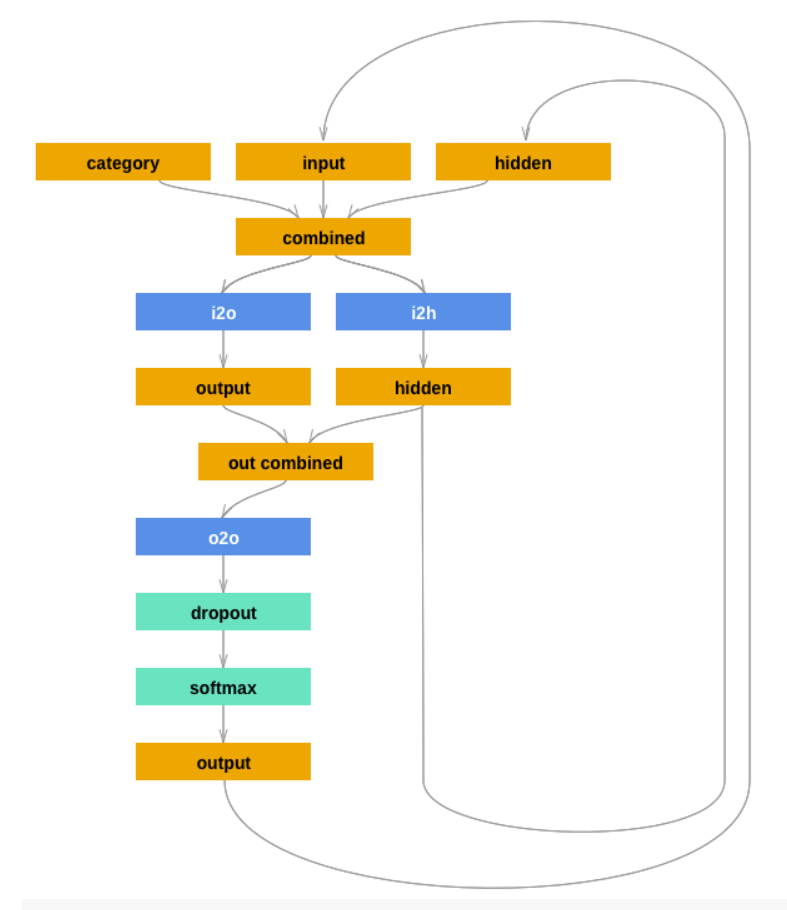








In [25]:
class RNN(nn.Module):

    def __init__(self,input_size,hidden_size,output_size):
        super(RNN,self).__init__()
        ## input_size and output size equal to the n_letters
        self.hidden_size=hidden_size
        
        self.combined_size=input_size+hidden_size+n_categories
        self.i20=nn.Linear(self.combined_size,output_size)
        self.i2h=nn.Linear(self.combined_size,hidden_size)
        self.o2o=nn.Linear(output_size+hidden_size,output_size)
        self.softmax = nn.LogSoftmax(dim=1)

    def forward(self,category,input,hidden):
        #input==>Current Letter ; shape: 1,inputS_size
        #hidden==>hidden_state; 
        #category=> one Hot Encoded Index; shape : 1,18
        combined_input=torch.cat((input,hidden,category),dim=1) ##1,input_size+hidden_size,n_categories
        print(f'combined_input.shape: {combined_input.shape}')
        output_1=self.i20(combined_input) ###1,output_size
        print(f'Output_1.shape: {output_1.shape}')
        hidden=self.i2h(combined_input)  ##1,hidden_size
        print(f'hidden.shape: {hidden.shape}')
        output_combined=torch.cat((output_1,hidden),dim=1) ##1,hidden_size+output_+size
        output=self.o2o(output_combined) ##
        print(f'output.shape: {output.shape}')
        output=nn.Dropout(0.3)(output)
        output = self.softmax(output)
        return hidden,output
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)


## Creating the data pipeline
For each timestep (that is, for each letter in a training word) the inputs of the network will be (category, current letter, hidden state) and the outputs will be (next letter, next hidden state). So for each training set, we’ll need the category, a set of input letters, and a set of output/target letters.

Since we are predicting the next letter from the current letter for each timestep, the letter pairs are groups of consecutive letters from the line - e.g. for "ABCD<EOS>" we would create (“A”, “B”), (“B”, “C”), (“C”, “D”), (“D”, “EOS”).

In [26]:
def randomChoice(l):
    return l[random.randint(0,len(l)-1)]


def randomTrainingPair():
    random_category=randomChoice(all_categories)
    random_line=randomChoice(category_lines[random_category])
    return random_category,random_line

In [27]:
category,line=randomTrainingPair()

In [28]:
line

'guerin'

In [29]:
def name2token(line):
    n_tokens=len(line)+2
    char_tokens=[0]*n_tokens

    # char_tokens=torch.zeros(size=(n_tokens,),)
    char_tokens[0]='<sos>'
    char_tokens[-1]='<eos>'
    char_tokens[1:-1]=list(line)
    return char_tokens
    

In [30]:
name2token(line)

['<sos>', 'g', 'u', 'e', 'r', 'i', 'n', '<eos>']

In [31]:
def token2ids(char_tokens):
    num_tokens=len(char_tokens)
    char_ids=torch.zeros(size=(num_tokens,))
    char_ids[0]=sos_index
    char_ids[-1]=eos_index
    char_ids[1:-1]=torch.tensor([all_letters.find(l) for l in char_tokens[1:-1]])
    char_ids=torch.where(char_ids==-1,unk_index,char_ids)
    return char_ids

In [32]:
##


def categoryTensor(category):
    li = all_categories.index(category)
    tensor = torch.zeros(1, n_categories)
    tensor[0][li] = 1
    return tensor



In [33]:
def inputTensor(line):
    char_tokens=name2token(line)
    
    ids=token2ids(char_tokens)[:-1] ## wont take the last tokens
    
    input_tensor=torch.zeros(size=(len(ids),1,n_letters),dtype=torch.int32)

    for i in range(len(ids)):
        
        char_id=int(ids[i])
        

        input_tensor[i][0][char_id]=1
    return input_tensor

def targetTensor(line):
    char_tokens=name2token(line)
    ids=token2ids(char_tokens)[1:]

    return ids.to(dtype=torch.int64) ## wont take the last tokens



In [34]:
target_ids=targetTensor(line)

In [35]:
target_ids

tensor([ 6, 20,  4, 17,  8, 13, 53])

In [36]:
input_ids=inputTensor(line)

In [37]:
input_ids

tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[

In [38]:
def randomTrainingExample():
    category, line = randomTrainingPair()
    category_tensor = categoryTensor(category)
    input_line_tensor = inputTensor(line)
    target_line_tensor = targetTensor(line)
    return category_tensor, input_line_tensor, target_line_tensor

In [39]:
category_tensor,input_line_tensor,target_line_tensor=randomTrainingExample()

In [40]:
input_line_tensor

tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 1, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0, 0, 0, 0]],

        [[

In [56]:
input_line_tensor[0].shape

torch.Size([1, 55])

In [57]:
output.shape

torch.Size([1, 55])

In [41]:
print(f'category shape: {category_tensor.shape}')
print(f'input shape: {input_line_tensor.shape}')
print(f'target shape: {target_line_tensor.shape}')

category shape: torch.Size([1, 18])
input shape: torch.Size([8, 1, 55])
target shape: torch.Size([8])


In [42]:
target_line_tensor

tensor([15,  4, 17,  4,  8, 17,  0, 53])

In [43]:
class RNN(nn.Module):

    def __init__(self,input_size,hidden_size,output_size):
        super(RNN,self).__init__()
        ## input_size and output size equal to the n_letters
        self.hidden_size=hidden_size
        
        self.combined_size=input_size+hidden_size+n_categories
        self.i20=nn.Linear(self.combined_size,output_size)
        self.i2h=nn.Linear(self.combined_size,hidden_size)
        self.o2o=nn.Linear(output_size+hidden_size,output_size)
        self.softmax=nn.LogSoftmax(dim=1)
        

    def forward(self,category,input,hidden):
        #input==>Current Letter ; shape: 1,inputS_size
        #hidden==>hidden_state; 
        #category=> one Hot Encoded Index; shape : 1,18
        combined_input=torch.cat((input,hidden,category),dim=1) ##1,input_size+hidden_size,n_categories
        #print(f'combined_input.shape: {combined_input.shape}')
        output_1=self.i20(combined_input) ###1,output_size
        #print(f'Output_1.shape: {output_1.shape}')
        hidden=self.i2h(combined_input)  ##1,hidden_size
        #print(f'hidden.shape: {hidden.shape}')
        output_combined=torch.cat((output_1,hidden),dim=1) ##1,hidden_size+output_+size
        output=self.o2o(output_combined) ##
        #print(f'output.shape: {output.shape}')
        output=nn.Dropout(0.5)(output)
        output = self.softmax(output)
        return hidden,output
    
    def initHidden(self):
        return torch.zeros(1, self.hidden_size)

        


In [44]:
### testing the model now 
hidden_size=256
rnn=RNN(input_size=n_letters,output_size=n_letters,hidden_size=hidden_size).to(device)
hidden=rnn.initHidden()

In [45]:
hidden_out,output=rnn(category_tensor.to(device),input_line_tensor[0].to(device),hidden.to(device))

In [50]:
category

'French'

In [51]:
output.shape

torch.Size([1, 55])

In [47]:

lr=0.0005
criterion=nn.NLLLoss().to(device)
optimizer=torch.optim.SGD(rnn.parameters(),lr=lr)

def train(category_tensor, input_line_tensor, target_line_tensor):
    rnn.train()
    
    hidden=rnn.initHidden().to(device)
    target_line_tensor=target_line_tensor.unsqueeze(dim=-1)
    category_tensor=category_tensor.to(device)
    optimizer.zero_grad()
    loss=torch.tensor([0]).to(device,dtype=torch.float32)

    for idx in range(len(input_line_tensor)):
        input_text=input_line_tensor[idx].to(device)
        target_text=target_line_tensor[idx].to(device)
        hidden,predicted_text=rnn(category_tensor,input_text,hidden)

        l=criterion(predicted_text,target_text)
        
        loss+=l
        
        
       
        
    loss.backward()
    optimizer.step()
    

    return loss.item() / input_line_tensor.size(0)



    
    

/home/akash/anaconda3/envs/vision/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [48]:
## We will do the training 
import time
import math

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

In [49]:
n_iters = 50000
print_every = 5000
plot_every = 500
all_losses = []
total_loss = 0 # Reset every ``plot_every`` ``iters``

start = time.time()

for iter in range(1, n_iters + 1):
    
    loss = train(*randomTrainingExample())
    total_loss += loss

    if iter % print_every == 0:
        print('%s (%d %d%%) %.4f' % (timeSince(start), iter, iter / n_iters * 100, loss))

    if iter % plot_every == 0:
        all_losses.append(total_loss / plot_every)
        total_loss = 0

0m 55s (5000 10%) 2.8191
1m 51s (10000 20%) 3.6324
2m 47s (15000 30%) 2.9740
3m 42s (20000 40%) 3.8532
4m 39s (25000 50%) 3.0809
5m 37s (30000 60%) 3.2722
6m 32s (35000 70%) 3.5727
7m 28s (40000 80%) 3.4916
8m 24s (45000 90%) 2.5995
9m 19s (50000 100%) 2.9546


In [50]:
## add temperature, and mask to unk idx ; break when argmax=eos or max letter
rnn

RNN(
  (i20): Linear(in_features=329, out_features=55, bias=True)
  (i2h): Linear(in_features=329, out_features=256, bias=True)
  (o2o): Linear(in_features=311, out_features=55, bias=True)
  (softmax): LogSoftmax(dim=1)
)

In [227]:
import matplotlib.pyplot as plt

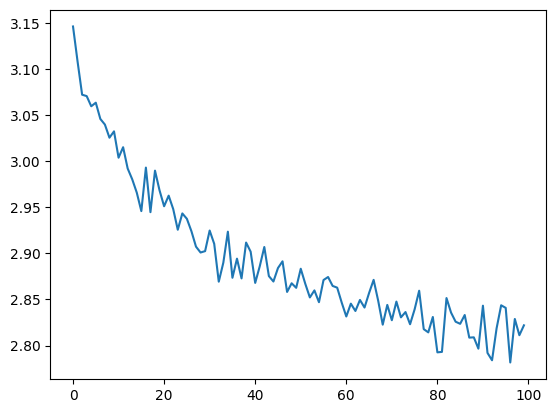

In [228]:
plt.plot(all_losses) ### does not look very good

In [229]:
save_dire='../saved_model/rnn_text_generation.pt'

In [230]:
torch.save(rnn.state_dict(),save_dire)

In [231]:
mask_token=torch.zeros(size=(1,1,n_letters))

In [232]:
mask_token[0][0][-1]=1e-9

In [233]:
t_ids=targetTensor('a12')

In [234]:
all_categories

['Arabic',
 'Chinese',
 'Czech',
 'Dutch',
 'English',
 'French',
 'German',
 'Greek',
 'Irish',
 'Italian',
 'Japanese',
 'Korean',
 'Polish',
 'Portuguese',
 'Russian',
 'Scottish',
 'Spanish',
 'Vietnamese']

In [235]:
'a' not in all_categories

True

In [236]:
torch.argmax(inputTensor('a')[1])

tensor(0)

In [237]:
input_tensor=inputTensor('a')

In [238]:
input_tensor[1].shape

torch.Size([1, 29])

In [239]:
category_tensor

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [240]:
hidden,output=rnn(category_tensor.to(device),input_tensor[0].to(device),hidden.to(device))

In [241]:
output.shape

torch.Size([1, 29])

In [242]:
torch.argmax(input_tensor)

tensor(26)

In [243]:
input_tensor

tensor([[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 1, 0, 0]],

        [[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0, 0, 0, 0, 0, 0]]], dtype=torch.int32)

In [244]:
torch.softmax(input_tensor.to(dtype=torch.float32),dim=2).shape

torch.Size([2, 1, 29])

In [245]:
rnn.eval()
start_text='a'
generated_text=unicodeToAscii(start_text)
category_tensor=categoryTensor(category).to(device)
input_tensor=inputTensor(start_text).to(device)
hidden=rnn.initHidden().to(device)


In [246]:
mask_tensor=torch.zeros(size=(1,1,n_letters)).to(device)
mask_tensor[0][0][unk_index]=float('-inf')


In [247]:
mask_tensor[0]

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., -inf]], device='cuda:0')

In [248]:
hidden_output,output=rnn(category_tensor,input_tensor[0],hidden)

In [249]:
output.shape

torch.Size([1, 29])

In [250]:
output.topk(k=1)

torch.return_types.topk(
values=tensor([[-2.2823]], device='cuda:0', grad_fn=<TopkBackward0>),
indices=tensor([[12]], device='cuda:0'))

In [251]:
torch.argmax(output,dim=1)

tensor([12], device='cuda:0')

In [252]:
torch.softmax(mask_tensor[0],dim=1)

tensor([[0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357,
         0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357,
         0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357, 0.0357,
         0.0357, 0.0000]], device='cuda:0')

In [253]:
torch.softmax((output+mask_tensor[0]),dim=-1)

tensor([[0.0268, 0.0474, 0.0664, 0.0429, 0.0268, 0.0268, 0.0268, 0.0268, 0.0054,
         0.0268, 0.0564, 0.0380, 0.1022, 0.0268, 0.0268, 0.0377, 0.0268, 0.0268,
         0.1005, 0.0511, 0.0268, 0.0268, 0.0205, 0.0268, 0.0268, 0.0268, 0.0020,
         0.0268, 0.0000]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [254]:
line='akash'

In [168]:
inputTensor(line).shape

torch.Size([6, 1, 29])

In [124]:
torch.zeros_like(input_tensor[0]).shape

torch.Size([1, 29])

In [255]:
def sample_generation(model,category,max_length,masked_idxs=[sos_index,unk_index],start_text='A',temperature=0.75):


    if  not category in all_categories:
        print(f'model is not trained for : {category}.') 
        return
    
    model.eval()
    generated_text=unicodeToAscii(start_text)
    category_tensor=categoryTensor(category).to(device)
    input_tensor=inputTensor(start_text).to(device)
    hidden=model.initHidden().to(device)

    ##create mask to prevent 'unk' from generation

    # mask_tensor=torch.zeros_like(input_tensor[0])
    mask_tensor=torch.zeros((1,n_letters)).to(device)
    for masked_idx in masked_idxs:
        mask_tensor[0][masked_idx]=float('-inf')


    

    for i in range(len(input_tensor)): ##updating the hidden 

        hidden,predicted_logits=model(category_tensor,input_tensor[i],hidden)

        predicted_logits_masked=predicted_logits+mask_tensor

        predicted_logits_masked/=temperature ## increasing the randomness of predicted text

        #prediction=torch.softmax(predicted_logits_masked,dim=-1)

        _,predicted_id=predicted_logits_masked.topk(k=1)

        if predicted_id ==eos_index:
            print('Predicted <eos> while updating hidden from given text.')
            break
        
        




    for i in range(max_length):

       

        hidden,predicted_logits=model(category_tensor,predicted_logits,hidden)

        predicted_logits_masked=predicted_logits+mask_tensor

        predicted_logits_masked/=temperature ## increasing the randomness of predicted text

        #prediction=torch.softmax(predicted_logits_masked,dim=-1)

        _,predicted_id=predicted_logits_masked.topk(k=1)

        if predicted_id ==eos_index:
            print('Predicted <eos>')
            break
        
      
        else:    
            predicted_char=all_letters[predicted_id]
            generated_text+=predicted_char

        
    return generated_text






            




    


In [256]:
generated_text=sample_generation(model=rnn,
                                 category='Spanish',
                                 max_length=10,
                                 masked_idxs=[unk_index,sos_index],
                                 start_text='B',
                                 temperature=0.75)

In [257]:
print(generated_text)

bdavanenova


In [258]:
def multiple_samples(n_samples,model,category,max_length,start_text='A',temperature=1.0):
    predicted_samples=[]

    for i in range(n_samples):
        predicted_samples.append(sample_generation(model=model,
                                 category=category,
                                 max_length=max_length,
                                 masked_idxs=[unk_index,sos_index],
                                 start_text=start_text,
                                 temperature=temperature))

    return predicted_samples

In [259]:
categoryTensor('Arabic')

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [260]:
generated_text_samples=multiple_samples(
                                 n_samples=5,
                                 model=rnn,
                                 category='English',
                                 max_length=5,
                                 start_text='b',
                                 temperature=0.75)

In [261]:
for sample in generated_text_samples:
    print(sample)

bnenhn
bnenov
bderen
bngama
bnarov


In [262]:

# Get multiple samples from one category and multiple starting letters
def samples(model,category,max_length,temperature=1.0, start_letters='ABC'):
    for start_letter in start_letters:
        print(sample_generation(model=model,
                                 category=category,
                                 max_length=max_length,
                                 masked_idxs=[unk_index,sos_index],
                                 start_text=start_letter,
                                 temperature=temperature))

In [264]:
samples(start_letters='RUS',
                model=rnn,
                category='Russian',
                max_length=7,

                temperature=0.75)

rvonenav
unanavin
snengure
